<h1>Que 1 - Why Linear Regression ??</h1>
<font size = "+1">Ans - 1. Easy to understand.  Unlike other algo like SVM, Deep Learning etc.<br>
2. Way to other algorithms. It is just like a foundation algorithm.<br>

<h4>Basically three types of LR are there.. </h4>
1. Simple LR (that only have one input and one output column.) <br>e.g., CGPA and IQ level. This Data can be used to predict the IQ based on CGPA.<br><br>
2. Multiple LR (more than one input column instead of one.)<br>
e.g., Car mileage, brand, fuel type, HP, price_for_sale. This data consists of only one output column i.e., price_for_sale. <br><br>
3. Polynomial LR (used when data is not linear completely).<br><br>



<h2> 1. Simple Linear Regression</h2>

<font size = "+1">First step in any ML algo is to Plot the data first.

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pydataset import data
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from ipywidgets import interactive
from sklearn.datasets import make_regression
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

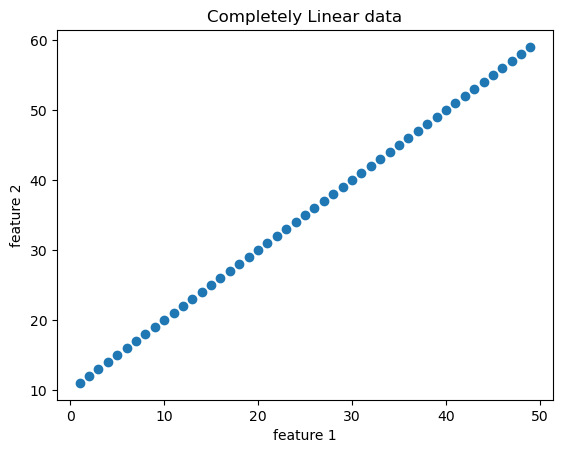

In [3]:
plt.scatter(x = range(1,50), y = range(11,60))
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("Completely Linear data")
plt.show()

<font size = "+1">What we will do in LR is plot a best fit line that passing through all the points using the equation <br> <b><i>y = mx + c </i></b>

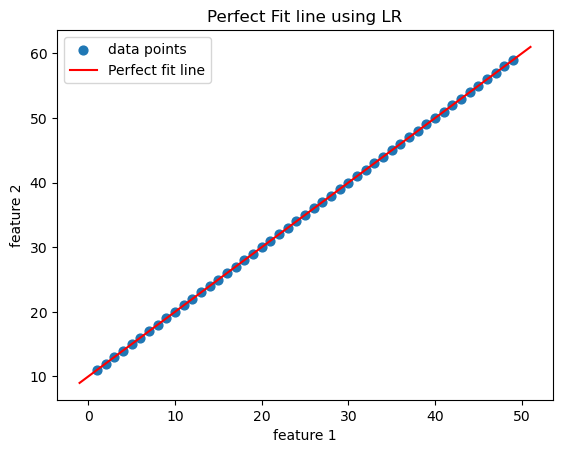

In [4]:
plt.scatter(x = range(1,50), y = range(11,60),s=40, label = "data points")
plt.plot(range(-1,52), range(9,62), color = 'r', label = "Perfect fit line")
plt.title("Perfect Fit line using LR")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()
plt.show()

<font size = "+1">Now, let see the real world data.

In [5]:
data_placement = pd.read_csv("placement.csv")

In [6]:
data_placement.head(5)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


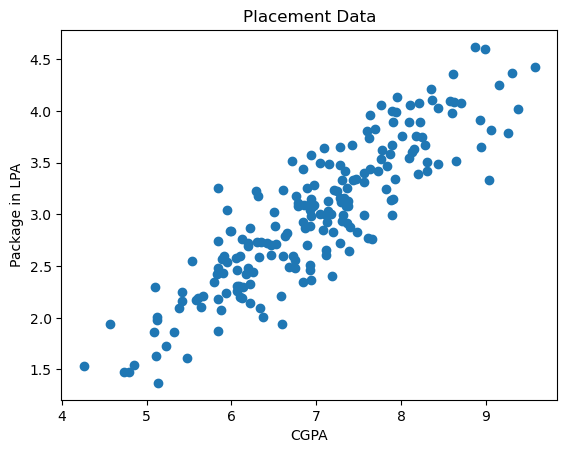

In [7]:
plt.scatter(x = data_placement["cgpa"], y = data_placement['package'])
plt.xlabel("CGPA")
plt.ylabel("Package in LPA")
plt.title("Placement Data")
plt.show()

<font size = "+1">Real world data is not comletely linear, but a <b>sort of linear</b>. It is because it contains noise in the data. <br>
Still, we will do the same task as before i.e., fitting a <b> Best fit Line </b> instead of perfect fit line on this data. Best fit line means that line will have minimum error on this data.<br>
What Linear regression do is, find that value of <b> m </b> and <b> c </b> in <b> y = mx + c </b> through which the line is closely passing through all the data points. This line is called <b> Best_fit_Line.</b>

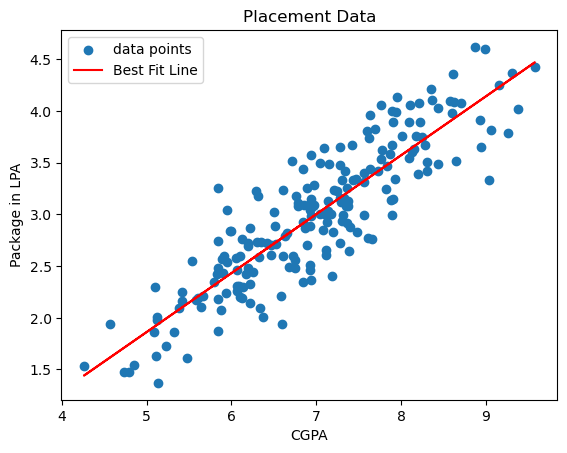

In [8]:
plt.scatter(x = data_placement["cgpa"], y = data_placement['package'], label = "data points")
plt.plot(data_placement["cgpa"], (0.5696  * data_placement['cgpa'] + -0.9857), color = 'r', label = "Best Fit Line")
plt.xlabel("CGPA")
plt.ylabel("Package in LPA")
plt.title("Placement Data")
plt.legend()
plt.show()

<h2> Let see how to build a model like this in Python.

In [9]:
x = data_placement.iloc[:,0:1]
y = data_placement.iloc[:, 1:]

In [10]:
x.head(5)

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94


In [11]:
y.head(5)

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(x_train, y_train)

LinearRegression()

In [16]:
pd.concat([x_test, y_test], axis = 1)

,cgpa,package
18,6.94,2.98
170,6.22,2.87
107,6.33,2.59
98,7.69,3.83
177,7.09,3.64
182,5.88,2.08
5,7.89,2.99
146,6.07,2.46
12,8.94,3.65
152,7.37,3.08


In [17]:
import warnings
warnings.filterwarnings('ignore')

print(lr.predict(np.array(7.28).reshape(-1,1)))
print(lr.predict(np.array(6.13).reshape(-1,1)))
print(lr.predict(np.array(8.44).reshape(-1,1)))

[[3.1660784]]
[[2.50329842]]
[[3.83462169]]


<font size = "+1">There are some errors in our model. Let see what are the values of slope and intercept our model choose.

In [18]:
display(lr.intercept_)
display(lr.coef_)

array([-1.02960704])

array([[0.57633042]])

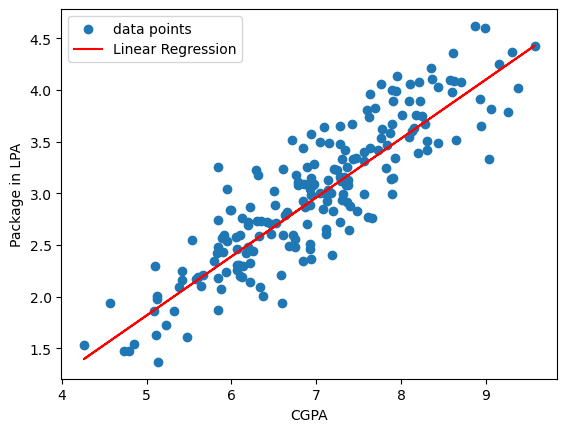

In [19]:
plt.scatter(x = data_placement["cgpa"], y = data_placement['package'], label = "data points")
plt.plot(data_placement["cgpa"], (0.57 * data_placement['cgpa'] + -1.03), color = 'r', label = "Linear Regression")
plt.xlabel("CGPA")
plt.ylabel("Package in LPA")
plt.legend()
plt.show()

In [20]:
ypred = lr.predict(x_test)

<font size = "4" >Intuition behind this is <br>
<b> y = m*x + c i.e., <br>
Package = m * CGPA + c </b><br><br>
m = weightage... i.e, how much package (y) depending on CGPA (x).<br><br>
if value of slope increases, the dependancy of package (y) on cgpa (x) also increase, and if value of slope decreases, the dependancy of package (y) on cgpa also derease (x). <br><br>
Now, let say, in a data with two columns Package and Experience,<b> Package = m * Experience + c </b> and intercept c is 0.<br> if m = 0 => that means Package also become 0 i.e., Freshers do not get any salary.<br> But this is not true, as even freshers get some package. And this package at m = 0 is c. We can say it as <i> offset or intercept. </i><br>We can say, The <b>regression_constant or offset or intercept or c</b> tells us the predicted value of the dependent variable or output or c when all of the <b>independent variables or input</b> equal 0. <br><br>
The general equation of straight line in linear regression is,<br>
<b>$y_{i} = \beta_{0} + \beta_{1} * x_{i} +\epsilon $</b><br>
where, $\epsilon$ = error we make during prediction.<br><br>
Now, we understood the intuition behind Linear regression, so we will learn how to find the values of $\beta_{0}$ and $\beta_{1} $. We can find the values $\beta_{0}$ and $\beta_{1} $ in two ways:<br>
1. <font color = "green" size = "4">**Closed form solution**</font> <font size = "4" >(i.e., using formulas that do not use derivatives) e.g., Shree dharacharya formula or quadratic formula for solving quadratic equations, OLS(Ordinary least square) method for solving $\beta_{0}$ and $\beta_{1} $.
2. <font color = "green" size = "4"> **Non - closed form solution** </font><font size = "4" >(i.e, using formulas that use derivatives) e.g., differential equations, Gradient descend method for solving $\beta_{0}$ and $\beta_{1} $.<br>
<br> The Algo which we have seen above i.e., Linear Regression from scikit-learn uses OLS method to solve for $\beta_{0}$ and $\beta_{1} $. The other algo like SGD regressor uses gradient descent method. OLS method is good for solving for $\beta_{0}$ and $\beta_{1} $ in low dimensional data. Gradient descent method is good for solving for $\beta_{0}$ and $\beta_{1} $ where data has more dimensions or say have more input features where OLS method will be painful.


<h3> Ordinary Least squares </h3>


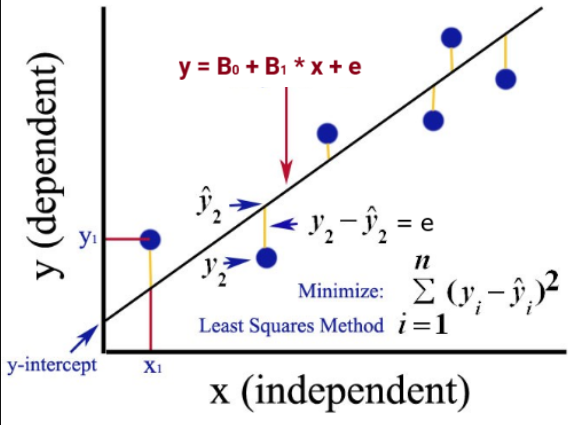

<font size = "4">$\mathbf{\text{The general equation is}}$<br></font>
<center><font size = "5">$y_{i} = \beta_{0} + \beta_{1} * x_{i} +\epsilon_{i} $</font>&emsp;&emsp;&emsp;<b>------(1)</center></b> <br>&emsp;&emsp;<font size = "4">where $y_{i}$ = dependent values, $i$ = 1,2,3....... n<br>
OLS estimates the parameters e.g., $\beta_{0}$ and $\beta_{1} $ by finding that values for the $\beta_{0}$ (constant) and $\beta_{1} $ (coefficient) that minimize the sum of the squared errors of prediction, i.e., the differences between a case’s actual score on the output variable and the score we predict for 
them using actual scores on the input variables.<br>Now, in running the regression model, what are trying to do is to minimize the sum 
of the squared errors of prediction – i.e., of the $\epsilon_{i}$ values – across all cases. 
Mathematically, this quantity can be expressed as
: 

<font size = "+1" COLOR = #42A6FF>
<b>Sum of squared errors,</b> </font><center><font size = "+2"><br>$SSE = \sum \limits _ {i = 0} ^ {n} \epsilon_{i} ^ 2$ &emsp;&emsp;&emsp;</font><b>------(2)</b></center>

<font size = "+1">
Specifically, what we want to do is find the values of  $\beta_{0}$ and $\beta_{1} $ that minimize the 
quantity in Equation 2 above. <br> For this, we need to 
express SSE in terms of $ \beta_{0}$ and $\beta_{1} $, take the derivatives of SSE with respect to $\beta_{0}$ and $\beta_{1} $, set these derivatives to zero, and solve for $\beta_{0}$ and $\beta_{1} $.

<font size = "+1">from (2) </font><br>
<center><font size = "+2">$\epsilon_{i} = (y_{i} - \beta_{1} * x_{i} - \beta_{0} ) $</font> &emsp;&emsp;&emsp;<b>------(3)</b></center>

<font size = "+1.5">$\mathbf{\text{Substituting (3) in (2)}}$
$$\displaystyle \Bigg[SSE = \sum \limits _ {i = 0} ^ {n} \epsilon_{i} ^ 2 = \sum \limits _ {i = 0} ^ {n} (y_{i} - \beta_{1} * x_{i} - \beta_{0})^2\Bigg]$$<br>
<font size = "+1">The least estimators of $\beta_{0}$ and $\beta_{1} $, say $\hat{\beta_{0}}$ and $\hat{\beta_{1}} $ must satisfy, $\frac{\partial (SSE)}{\partial\beta_{0}}\Bigg|_{\hat{\beta_{0}}  \hat{\beta_{1}}} = 0$ and $\frac{\partial (SSE)}{\partial\beta_{1}} \Bigg|_{\hat{\beta_{0}}  \hat{\beta_{1}}}= 0$<br>
<font color = #9F3DBA>**(i) differentiating w.r.t $\beta_{0}$,** </font><br>
=> &emsp;$\frac{\partial (SSE)}{\partial\beta_{0}}\Bigg|_{\hat{\beta_{0}}  \hat{\beta_{1}}} = \frac{\partial \sum\limits _ {i = 0} ^ {n}(y_{i} - \hat{\beta_{1}} * x_{i} - \hat{\beta_{0}} )^2}{\partial \hat{\beta_{0}}} = 0$<br>
=> &emsp;$-2 * \sum\limits _ {i = 0} ^ {n}(y_{i} - \hat{\beta_{1}} * x_{i} - \hat{\beta_{0}} ) = 0$<br>
=> &emsp;$\sum\limits _ {i = 0} ^ {n}(y_{i}) - \hat{\beta_{1}} * \sum\limits _ {i = 0} ^ {n}(x_{i}) - n * \hat{\beta_{0}} = 0$<br>
=> &emsp;$\frac{\sum\limits _ {i = 0} ^ {n}(y_{i}) - \hat{\beta_{1}} * \sum\limits _ {i = 0}^{n}(x_{i})}{n} = \hat{\beta_{0}}$<br>
=> &emsp;$\frac{\sum\limits _ {i = 0} ^ {n}(y_{i})}{n} - \frac{\hat{\beta_{1}} * \sum\limits _ {i = 0}^{n}(x_{i})}{n} = \hat{\beta_{0}}$<br>
 &emsp;<b>$\bar{y} -  \hat{\beta_{1}} * \bar{x} =  \hat{\beta_{0}}$ &emsp; &emsp;-------(4) </b><br><br>
<font color = #9F3DBA>**(ii) differentiating w.r.t $\beta_{1}$,** </font><br>
=> &emsp;$\frac{\partial (SSE)}{\partial\beta_{1}}\Bigg|_{\hat{\beta_{0}}  \hat{\beta_{1}}} = \frac{\partial \sum\limits _ {i = 0} ^ {n}(y_{i} - \hat{\beta_{1}} * x_{i} - \hat{\beta_{0}} )^2}{\partial \hat{\beta_{1}}} = 0$<br>
=> &emsp;$-2 * \sum\limits _ {i = 0} ^ {n}(y_{i} - \hat{\beta_{1}} * x_{i} - \hat{\beta_{0}} ) * x_{i} = 0$<br>
Substituting the value of $\hat{\beta_{0}}$ from (4), <br>
=> &emsp;$\sum\limits _ {i = 0} ^ {n}(y_{i} - \hat{\beta_{1}} * x_{i} - (\bar{y} - \hat{\beta_{1}} * \bar{x})) = 0$<br>
=> &emsp;$\sum\limits _ {i = 0} ^ {n}((y_{i} - \bar{y}) - \hat{\beta_{1}} * (x_{i} - \bar{x})) = 0$<br>
=> &emsp;$\hat{\beta_{1}} = \frac{\sum\limits _ {i = 0} ^ {n}(y_{i} - \bar{y})}{\sum\limits _ {i = 0} ^ {n}(x_{i} - \bar{x})}$<br>
$\hat{\beta_{1}} = \frac{\sum\limits _ {i = 0} ^ {n}(y_{i} - \bar{y}) * (x_{i} - \bar{x})}{\sum\limits _ {i = 0} ^ {n}(x_{i} - \bar{x})^2}$ &emsp;&emsp;<b>--------- (5)</B><br><br>
using (4) and (5), we will find that values of $\beta_{1} \textrm { and  } \beta_{0}$, that will minimize the error $\epsilon$ .

In [21]:
# converting eq(4) and (5) into python function,
def ools(x, y):
    assert(len(x) == len(y))
    import numpy as np
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    Nr = 0
    Dr = 0
    for i in range(len(x)):
        Nr += (y[i] - mean_y)*(x[i] - mean_x)
        Dr += (x[i] - mean_x)**2
    beta1 = Nr / Dr
    beta0 = mean_y - (beta1 * mean_x)
    return (beta0, beta1)

In [22]:
ools(x_train.reset_index()['cgpa'], y_train.reset_index()['package'])

(-1.0296070415163068, 0.5763304184634158)

In [23]:
display(lr.intercept_)
display(lr.coef_)

array([-1.02960704])

array([[0.57633042]])

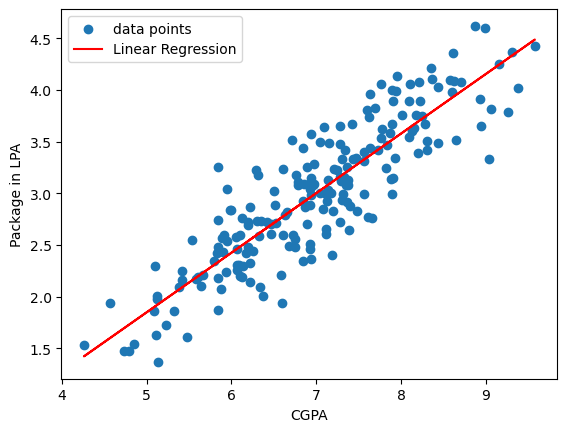

In [24]:
plt.scatter(x = data_placement["cgpa"], y = data_placement['package'], label = "data points")
plt.plot(data_placement["cgpa"], (0.576 * data_placement['cgpa'] + -1.03), color = 'r', label = "Linear Regression")
plt.xlabel("CGPA")
plt.ylabel("Package in LPA")
plt.legend()
plt.show()

<h3> Relationship between slope and squared errors</h3>

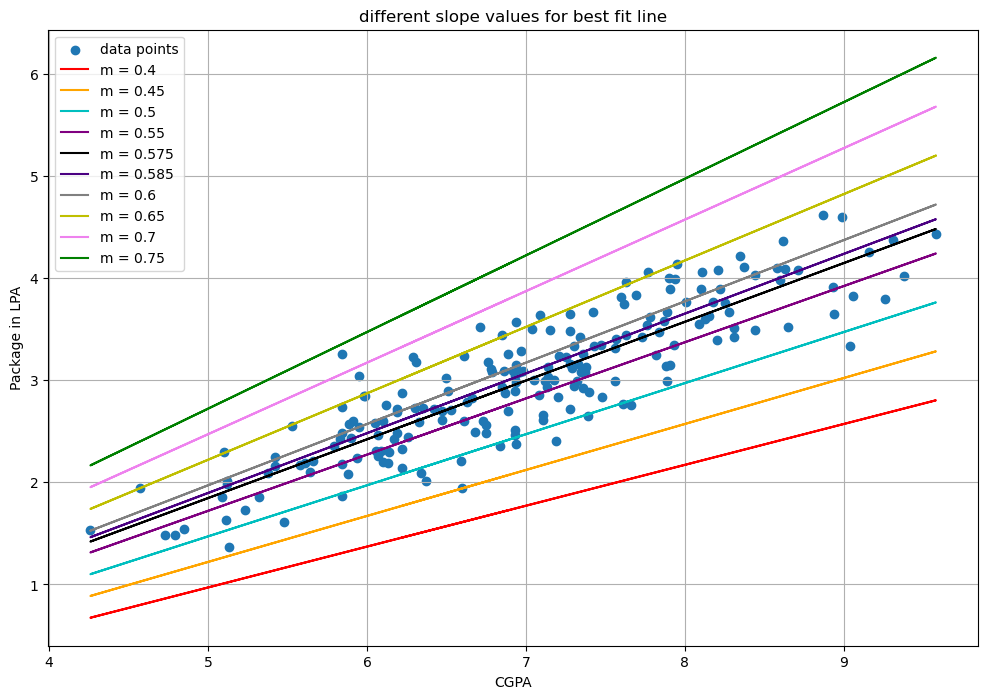

In [25]:
plt.figure(figsize = (12,8))
plt.scatter(x = data_placement["cgpa"], y = data_placement['package'], label = "data points")
plt.plot(data_placement["cgpa"], (0.4 * data_placement['cgpa'] + -1.03), color = 'r', label = "m = 0.4")
plt.plot(data_placement["cgpa"], (0.45 * data_placement['cgpa'] + -1.03), color = 'orange', label = "m = 0.45")
plt.plot(data_placement["cgpa"], (0.5 * data_placement['cgpa'] + -1.03), color = 'c', label = "m = 0.5")
plt.plot(data_placement["cgpa"], (0.55 * data_placement['cgpa'] + -1.03), color = 'purple', label = "m = 0.55")
plt.plot(data_placement["cgpa"], (0.575 * data_placement['cgpa'] + -1.03), color = 'black', label = "m = 0.575")
plt.plot(data_placement["cgpa"], (0.585 * data_placement['cgpa'] + -1.03), color = 'indigo', label = "m = 0.585")
plt.plot(data_placement["cgpa"], (0.6 * data_placement['cgpa'] + -1.03), color = 'grey', label = "m = 0.6")
plt.plot(data_placement["cgpa"], (0.65 * data_placement['cgpa'] + -1.03), color = 'y', label = "m = 0.65")
plt.plot(data_placement["cgpa"], (0.7 * data_placement['cgpa'] + -1.03), color = 'violet', label = "m = 0.7")
plt.plot(data_placement["cgpa"], (0.75 * data_placement['cgpa'] + -1.03), color = 'g', label = "m = 0.75")
plt.xlabel("CGPA")
plt.ylabel("Package in LPA")
plt.title("different slope values for best fit line")
plt.grid()
plt.legend()
plt.show()

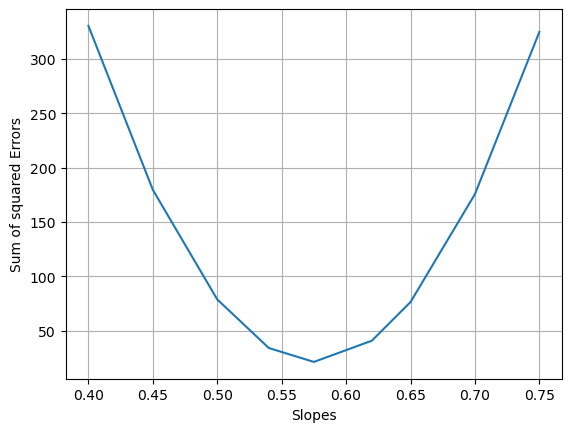

In [26]:
slopes = [0.4, 0.45, 0.5, 0.54, 0.575, 0.62, 0.65, 0.7, 0.75]
intercept = -1.03
errors = []
for i in slopes:
    sum = 0
    for j in range(len(data_placement['package'])):
        sum += (data_placement['package'].values[j] - (i * data_placement['cgpa'].values[j] + intercept))**2
    errors.append(sum)
plt.plot(slopes, errors)
plt.xlabel("Slopes")
plt.ylabel("Sum of squared Errors")
plt.grid()
plt.show()

In [27]:
pd.DataFrame({'squared_errors_by_slope':errors, 'slope':slopes})

,squared_errors_by_slope,slope
0,330.411924,0.400
1,179.609483,0.450
2,78.812050,0.500
3,34.177708,0.540
4,21.375288,0.575
5,40.918638,0.620
6,76.449792,0.650
7,175.672386,0.700
8,324.899987,0.750


<h3> Relationship between intercept and squared errors</h3>

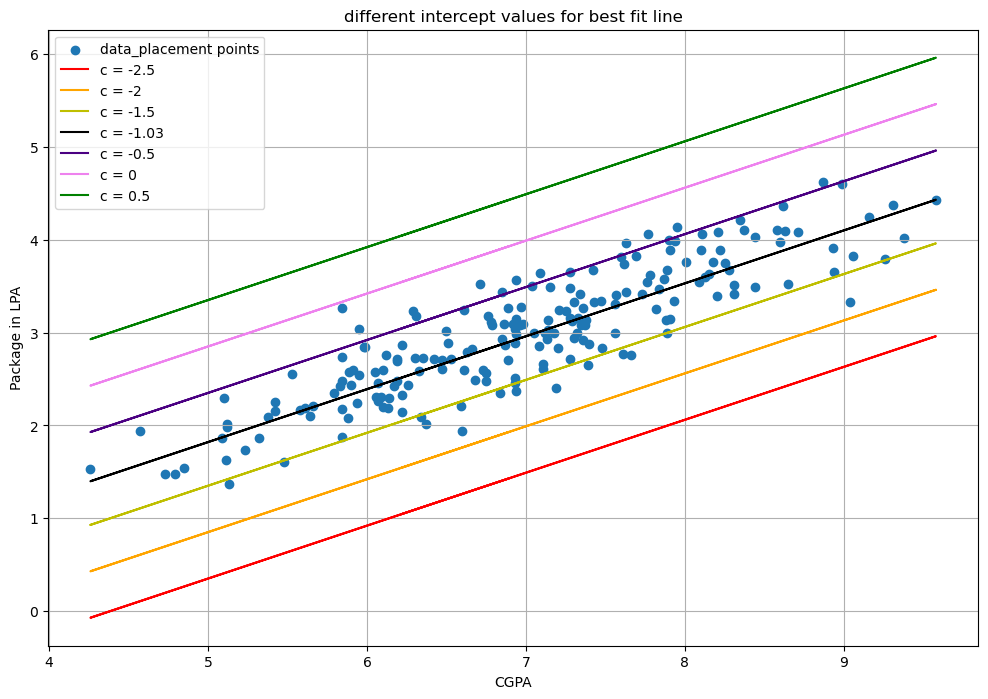

In [28]:
plt.figure(figsize = (12,8))
plt.scatter(x = data_placement["cgpa"], y = data_placement['package'], label = "data_placement points")
plt.plot(data_placement["cgpa"], (0.57 * data_placement['cgpa'] + -2.5), color = 'r', label = "c = -2.5")
plt.plot(data_placement["cgpa"], (0.57 * data_placement['cgpa'] + -2), color = 'orange', label = "c = -2")
plt.plot(data_placement["cgpa"], (0.57 * data_placement['cgpa'] + -1.5), color = 'y', label = "c = -1.5")
plt.plot(data_placement["cgpa"], (0.57 * data_placement['cgpa'] + -1.03), color = 'black', label = "c = -1.03")
plt.plot(data_placement["cgpa"], (0.57 * data_placement['cgpa'] + -0.5), color = 'indigo', label = "c = -0.5")
plt.plot(data_placement["cgpa"], (0.57 * data_placement['cgpa'] + 0), color = 'violet', label = "c = 0")
plt.plot(data_placement["cgpa"], (0.57 * data_placement['cgpa'] + 0.5), color = 'g', label = "c = 0.5")
plt.xlabel("CGPA")
plt.ylabel("Package in LPA")
plt.title("different intercept values for best fit line")
plt.legend()
plt.grid()
plt.show()

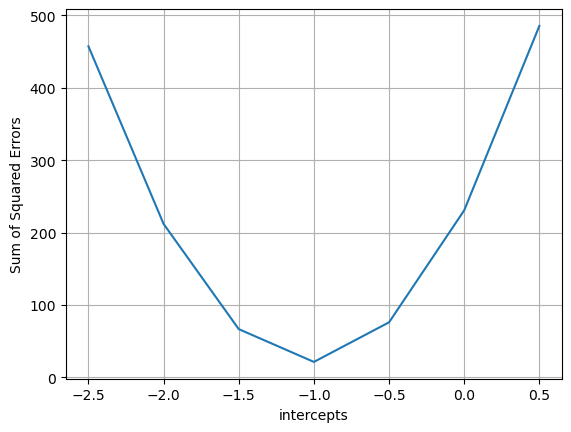

In [29]:
slope = 0.575
intercepts = np.arange(-2.5, 0.6, 0.5)
errors = []
for i in intercepts:
    sum = 0
    for j in range(len(data_placement['package'])):
        sum += (data_placement['package'].values[j] - (slope * data_placement['cgpa'].values[j] + i))**2
    errors.append(sum)
plt.plot(intercepts, errors)
plt.xlabel("intercepts")
plt.ylabel("Sum of Squared Errors")
plt.grid()
plt.show()

In [30]:
pd.DataFrame({'squared_errors_by_intercepts':errors, 'intercept':intercepts})

,squared_errors_by_intercepts,intercept
0,457.384638,-2.5
1,212.082138,-2.0
2,66.779638,-1.5
3,21.477138,-1.0
4,76.174638,-0.5
5,230.872138,0.0
6,485.569638,0.5


<h3> Relationship between both intercept & slope with squared errors</h3>

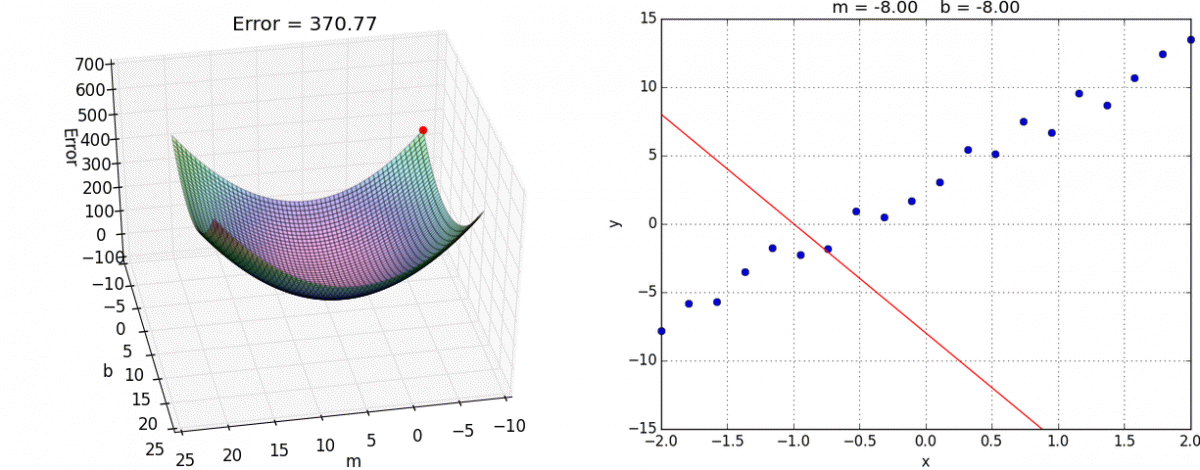

<h2>Regression Metrics </h2>

<font size = "+1">Machine learning model cannot have 100 % efficiency otherwise the model is known as a biased model. which further includes the concept of overfitting and underfitting. <br> It is necessary to obtain the accuracy on training data, But it is also important to get a genuine and approximate result on unseen data otherwise, Model is of no use. <br> So, to build and deploy a generalized model we require to Evaluate the model on different metrics which helps us to better optimize the performance, fine-tune it, and obtain a better result. <br>
If one metric is perfect, there will be no need for multiple metrics. But, different evaluation metric fits on a different set of a dataset.
<h3><font color = #D92491> 1. Mean Absolute Error (MAE) </font> </h3> 
<font size = "+2">$$ MAE = \frac {1}{n} \sum_{i = 1}^{n}| y_{i} - \hat y_{i}|$$</font>
<font size = "+1"> &emsp;&emsp;$\mathbf {\text{where, $y$ = Actual values, $\hat y$ = predicted value.}}$ <br>MAE is a very simple metric which calculates the absolute difference between actual and predicted values.

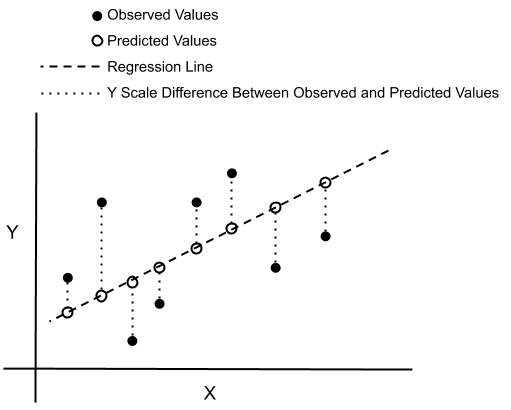

<font size = "4"> Our aim is to *minimize* the MAE.
<h4><font color = blue> Advantages</font></h4>
<font size = "4"> 1. It is always in terms of Y, so it is easy to understand the loss. e.g., in this case, the Loss will be 1.5LPA or 2LPA.<br>
2. Robust to outliers.
<h4><font size = "4" color = blue> Disadvantages</font></h4>
1. The graph of MAE is not differentiable (mainly at $x$ = 0) so we have to apply various optimizers like Gradient descent which can be differentiable.

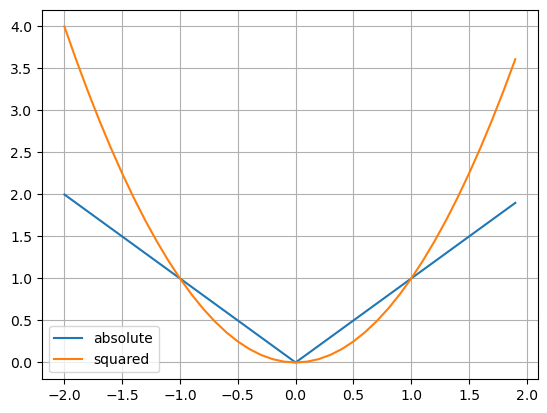

In [31]:
x = np.arange(-2,2,0.1)
y1 = np.abs(x)
y2 = np.square(x)
plt.plot(x, y1, label = "absolute")
plt.plot(x, y2, label = "squared")
plt.grid()
plt.legend()
plt.show()

In [32]:
print("MAE = ", mean_absolute_error(y_true=y_test, y_pred=ypred))

MAE =  0.2552433448620408


<h3><font color = #D92491> 2. Mean Squared Error (MSE) </font> </h3> 
<font size = "5">$$ MSE = \frac {1}{n} \sum_{i = 1}^{n}( y_{i} - \hat y_{i})^2$$</font>
<font size = "4"> &emsp;&emsp;$\mathbf {\text{where, $y$ = Actual values, $\hat y$ = predicted value.}}$ <br>
MSE is a most used and very simple metric with a little bit of change in mean absolute error. Mean squared error states that finding the squared difference between actual and predicted value.
<h4><font color = blue size=4> Advantages</font></h4>
1. The graph of MSE is differentiable at all values of $x$, so you can easily use it as a loss function.
<h4><font color = blue size=4> Disadvantages</font></h4>
1. The value you get after calculating MSE is a squared unit of output. for example, the output variable is in meter($m$) then after calculating MSE the output we get is in meter squared ($m^2$).<br>
2. 
If you have outliers in the dataset then it penalizes the outliers most and the calculated MSE is bigger. So, in short, it is not Robust to outliers which were an advantage in MAE. e.g., Red Mark in below figure.<br><br> What MSE acutally calculate is, sum up the area of all squares and trying to minimize it.. </font>

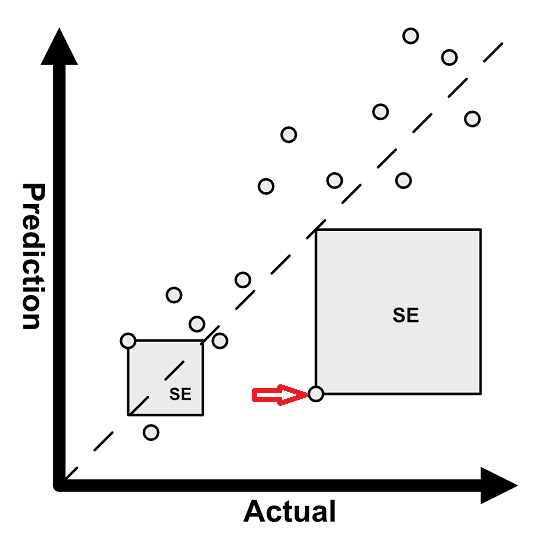

In [33]:
print("MSE = ", mean_squared_error(y_true=y_test, y_pred=ypred))

MSE =  0.10221131059334207


<h3><font color = #D92491> 3. Root Mean Squared Error (RMSE) </font> </h3> 
<font size = "+2">$$ RMSE = \sqrt{MSE} = \sqrt{\frac {1}{n} \sum_{i = 1}^{n}( y_{i} - \hat y_{i})^2}$$</font>
<font size = "+1"> &emsp;&emsp;$\mathbf {\text{where, $y$ = Actual values, $\hat y$ = predicted value.}}$ <br>
As RMSE is clear by the name itself, that it is a simple square root of mean squared error.<br>
Most of the times, RMSE is used. In Deep Learning, RMSE is mostly used metric.
<h4><font color = blue size=4> Advantages</font></h4>
1. The output value you get is in the same unit as the required output variable which makes interpretation of loss easy.
<h4><font color = blue size=4> Disadvantages</font></h4>
1. It is not that robust to outliers as compared to MAE.

In [34]:
print("RMSE = ",np.sqrt(mean_squared_error(y_true=y_test, y_pred=ypred)))

RMSE =  0.31970503685951224


<h3><font color = #D92491> 4. R Squared Error (R<sup>2</sup>) </font> </h3> 
<font size = "+2">$$ R^2 = 1 - \frac {SS_{Res}}{SS_{Tot}} = 1 - \frac { \sum_{i = 1}^{n} (y_{i} - \hat y_{i})^2}{\sum_{i = 1}^{n} (y_{i} - \bar y_{i})^2}$$</font>
<font size = "+1"> &emsp;&emsp;$\mathbf {\text{where, $SS_{Res}$ = Residual Sum of Squares, $SS_{Tot}$ = Total Sum of Squares,}}$ <br>  &emsp;&emsp;$\mathbf {\text{ $y$ = Actual values, $\hat y$ = predicted value, $\bar y$ = mean of y}}$ <br><br>
• R square score is a metric that tells the performance of your model, not the loss in an absolute sense that how well did your model perform. R square score also known as <I><b>coefficient of determination</b></i> or <I><b> goodness of fit</b>.</i> <br>
• R-square is a comparison of the residual sum of squares ($SS_{Res}$) with the total sum of squares ($SS_{Tot}$).<br>
• The value of R square lies between 0 to 1 generally. We get R-square == 1, when the model perfectly fits the data and there is no difference between the predicted value and actual value. However, we get R-square == 0 when the model does not predict any variability in the model and it does not learn any relationship between the dependent and independent variables and just predicting the average. In this case, both mean and regression lines are overlapping means model performance is worst, it is not capable to take advantage of the output column.<br><br>

<b>Que. </b> Is it possible to have R-squared score less than zero?


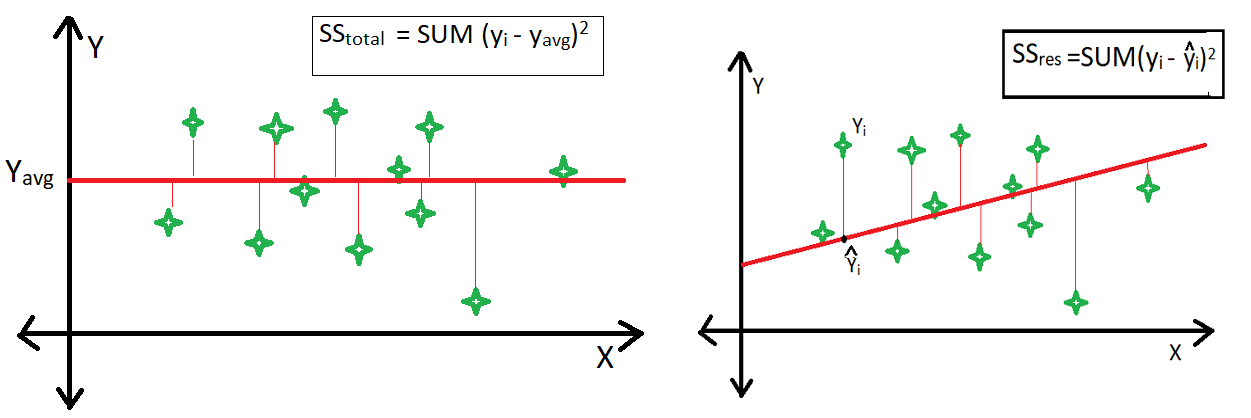

<font size = "+1">
<h4><font color = blue size=4> Advantages</font></h4>
1. MAE and MSE depend on the context as we have seen whereas the $R^2$ score is independent of context.<br>
2. Applicable on multiple algorithms.
<h4><font color = blue size=4> Disadvantages</font></h4>
1. It is expected that more no. of input variables will explain more variation of Output i.e., more information, more accuracy. <br>The value of r-square always increases or remains the same as new variables are added to the model, without detecting the significance of this newly added variable (i.e. the value of r-square never decreases on the addition of new attributes to the model). As a result, non-significant attributes can also be added to the model with an increase in the r-square value.<br>
2. This is because $SS_{Tot}$ is always constant and the regression model tries to decrease the value of $SS_{Res}$ by finding some correlation with this new attribute hence the overall value of r-square increases, which can lead to a poor regression model.<br><br>


Note: The value of R-square can also be negative when the model fitted is worse than the average fitted model. 

In [35]:
# to calculate
r2 = r2_score(y_true=y_test, y_pred = ypred)
print("R-sq. score = ", np.round(r2,3))

R-sq. score =  0.73


<font size = "+1">
<h4><font color = blue> Significance</font></h4>
<font size = "5">$ R^2 = 1 - \frac {\mathbf {\text{Unexplained Variation}}}{\mathbf {\text{Total Variation}}}$ </font><font size = "4"><br><br>
1. R-squared ($R^2$) is a statistical measure that represents the proportion of the variance for a dependent variable that’s explained by an independent variable in a regression model. <br>
2. It explains the extent to which the variance of one variable explains the variance of the second variable. So, the $R^2$ of our model is $0.73$, that means approximately 73% of the total observed variation of Package can be explained by the model’s inputs i.e., cgpa . Remaining 17% variation is not explained by model input, and there can be any reason which can not be incorporated here using maths like interview gone well, or candidate has some reference etc..

<h3><font color = #D92491> 5. Adjusted R Squared Error (R<sub>a</sub><sup>2</sup>) </font> </h3> 
<font size = "4">
The problem with $R^2$ is when we add an irrelevant feature in the dataset then at that time $R^2$ sometimes starts increasing which is incorrect. <br>
$$ R^2_a = 1 - \Bigg [\Bigg (\frac{n - 1}{n - k - 1}\Bigg) \times (1 - R^2) \Bigg ]$$
<font size = "+1"> &emsp;&emsp;$\mathbf {\text{where, $R^2$ = r squared error, $n$ = Total sample size (no. of rows), $k$ = number of predictors}}$  <br><br>
Now as $k$ increases <font size = 5> ↑ </font> by adding some features so the denominator $(n -k -1)$ will decrease <font size = 5> ↓ </font>, $(n - 1)$ will remain constant. $R^2$ score will remain constant or will increase <font size = 5> ↑ </font> slightly so the complete answer will increase<font size = 5> ↑ </font>and when we subtract this from one then the resultant score $R^2_a$ will decrease <font size = 5>↓</font>. So, this is the case when we add an irrelevant feature in the dataset.

And if we add a relevant feature then the $R^2$ score will increase<font size = 5> ↑ </font> and $(1 - R^2)$ will decrease heavily<font size = 5> ↓↓ </font> and the denominator $(n -k -1)$ will also decrease <font size = 5> ↓ </font> so the complete term decreases<font size = 5> ↓ </font>, and on subtracting from one, the $R^2_a$ score increases <font size = 5>↑</font>. <br><br>
Hence, this metric becomes one of the most important metrics to use during the evaluation of the model. This method is useful when we have multiple inputs like multiple linear regression.

In [36]:
# function for adjusted r square
def r2_adj(n, k, r2):
    temp = 1-((n-1)/(n-k-1) * (1-r2))
    return temp

In [37]:
score = r2_adj(n = len(x_test), k = len(x_test.columns), r2 = r2_score(y_true=y_test, y_pred = ypred))
print("R2 adj = ", np.round(score, 3))

R2 adj =  0.723


<h3> Adding a irrelevant random column in our data to check if $R^2_a$ decreases or not

In [38]:
new_df = data_placement.copy()
print(new_df.shape)

(200, 2)


In [39]:
new_df["random_feature1"] = np.random.random(200)
new_df.head()

,cgpa,package,random_feature1
0,6.89,3.26,0.616258
1,5.12,1.98,0.105542
2,7.82,3.25,0.559861
3,7.42,3.67,0.751307
4,6.94,3.57,0.323282


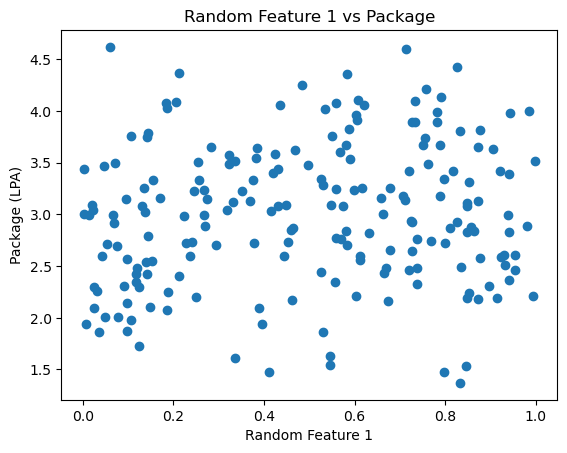

In [40]:
plt.scatter(new_df['random_feature1'], new_df['package'])
plt.xlabel("Random Feature 1"); plt.ylabel("Package (LPA)"); plt.title("Random Feature 1 vs Package");
plt.show()

<font size = "+1">no relationship between both variables.

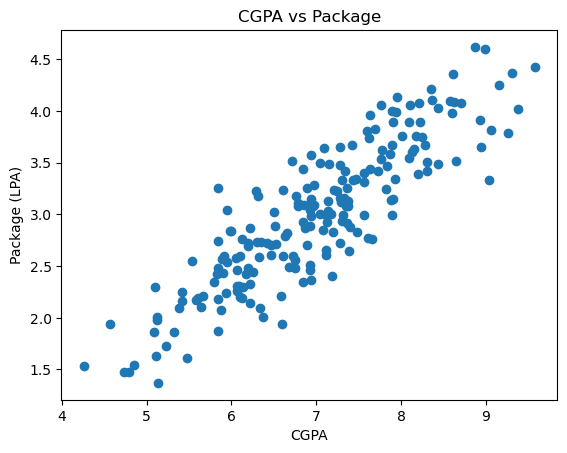

In [41]:
plt.scatter(new_df['cgpa'], new_df['package'])
plt.xlabel("CGPA"); plt.ylabel("Package (LPA)"); plt.title("CGPA vs Package");
plt.show()

In [42]:
# input
independent_features = [col for col in new_df.columns if col != 'package']
independent_features

['cgpa', 'random_feature1']

In [43]:
x1 = new_df[independent_features]
x1.head()

,cgpa,random_feature1
0,6.89,0.616258
1,5.12,0.105542
2,7.82,0.559861
3,7.42,0.751307
4,6.94,0.323282


In [44]:
# output
y1 = new_df['package']
pd.DataFrame(y1).head()

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57


In [45]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=0)

In [46]:
lr1 = LinearRegression()
lr1.fit(x_train1, y_train1)
y_pred1 = lr1.predict(x_test1)

In [47]:
print("new_df R squared = ", np.round(r2_score(y_true=y_test1, y_pred=y_pred1),2))

new_df R squared =  0.73


In [48]:
adj_r2_1 = r2_adj(n = len(x_test1), k = len(x_test1.columns), 
                  r2 = r2_score(y_true=y_test1, y_pred = y_pred1))
print("new_df R-sq adjusted = ", np.round(adj_r2_1, 2))

# old adj r squared
print("old adj r squared =", score)

new_df R-sq adjusted =  0.71
old adj r squared = 0.7226040784587475


<font size = "+1">So, Adjusted R Squared decreased..

<h3> Adding a relevant column in our data to check if $R^2_a$ decreases or not

In [49]:
new_df2 = data_placement.copy()
print(new_df2.shape)

(200, 2)


In [50]:
new_df2['iq'] = new_df2['package'] + (np.random.randint(-5,5,200)/10)
new_df2 = new_df2[['cgpa','iq','package']]

In [51]:
new_df2.head()

,cgpa,iq,package
0,6.89,3.36,3.26
1,5.12,1.48,1.98
2,7.82,3.35,3.25
3,7.42,3.87,3.67
4,6.94,3.37,3.57


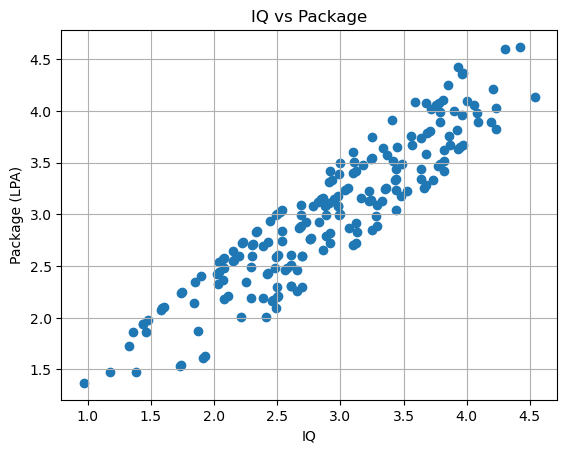

In [52]:
plt.scatter(new_df2['iq'], new_df['package'])
plt.xlabel("IQ"); plt.ylabel("Package (LPA)"); plt.title("IQ vs Package");
plt.grid(); plt.show()

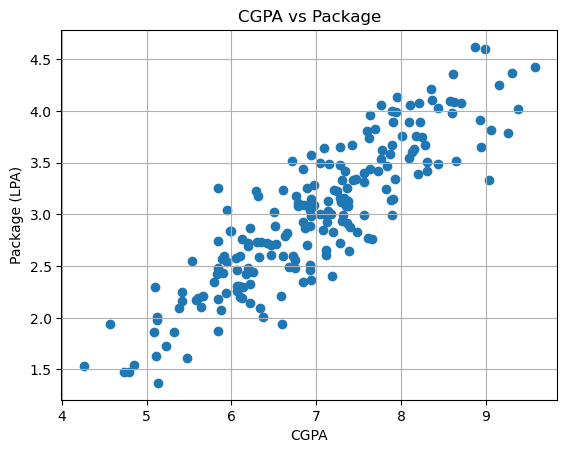

In [53]:
plt.scatter(new_df['cgpa'], new_df['package'])
plt.xlabel("CGPA"); plt.ylabel("Package (LPA)"); plt.title("CGPA vs Package");
plt.grid(); plt.show()

In [54]:
x2 = new_df2.iloc[:, :2]
x2.head()

,cgpa,iq
0,6.89,3.36
1,5.12,1.48
2,7.82,3.35
3,7.42,3.87
4,6.94,3.37


In [55]:
y2 = new_df2.iloc[:, 2:]
y2.head()

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57


In [56]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=0)

In [57]:
lr2 = LinearRegression()
lr2.fit(x_train2, y_train2)
y_pred2 = lr2.predict(x_test2)

In [58]:
print("new_df2 R squared = ", r2_score(y_true=y_test2, y_pred=y_pred2))

new_df2 R squared =  0.8638101064981465


In [59]:
adj_r2_2 = r2_adj(n = len(x_test2), k = len(x_test2.columns), 
                  r2 = r2_score(y_true=y_test2, y_pred = y_pred2))
print("new_df2 R-sq adjusted = ", adj_r2_2)

new_df2 R-sq adjusted =  0.8564484906331815


In [60]:
# old adj r squared
print("old adj r squared =", score)

old adj r squared = 0.7226040784587475


<font size = "+1">Adj R squared increased...

<h2><font color = #20B59F> Assumptions of Linear Regression </font></h2>
<font size = "4"> The theory of linear regression is based on certain statistical assumptions. It is crucial to check these regression assumptions before modeling the data using the linear regression approach.<br><br>
Mainly there are <i>7 assumptions </i>taken while using Linear Regression:<br>
<h4> <font color = #20B59D> 1. Linear relationship between the independent and dependent variables</font></h4>
The reason behind this relationship is that if the relationship will be non-linear which is certainly is the case in the real-world data then the predictions made by our linear regression model will not be accurate and will vary from the actual observations a lot.<br>
<h4> <font color = #20B59D> 2. No Multicolinearlity in the data</font></h4>
    Multicollinearity is a statistical phenomenon that occurs when two or more independent variables in a regression model are highly correlated with each other. In other words, multicollinearity indicates a strong linear relationship among the predictor variables. This can create challenges in the regression analysis because it becomes difficult to determine the individual effects of each independent variable on the dependent variable accurately.<br>

Multicollinearity can lead to unstable and unreliable coefficient estimates, making it harder to interpret the results and draw meaningful conclusions from the model. It is essential to detect and address multicollinearity to ensure the validity and robustness of regression model<br>
For e.g., Balram loves watching television while munching on chips. The more television he watches, the more chips he eats, and the happier he gets!<br>

Now, if we could quantify happiness and measu Balram'sin’s happiness while he’s busy doing his favorite activity, which do you think would have a greater impact on his happiness? Having chips or watching television? That’s difficult to determine because the moment we try to measBalramolin’s happiness from eating chips, he starts watching television. And the moment we try to measure his happiness from watching television, he starts eating ch<br> Eating chips and watching television are highly correlated in the case of Balram, and we cannot individually determine the impact of individual activities on his happiness. This is the multicollinearity problem!l</i>.

In [61]:
data('iris').corr(numeric_only=True)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


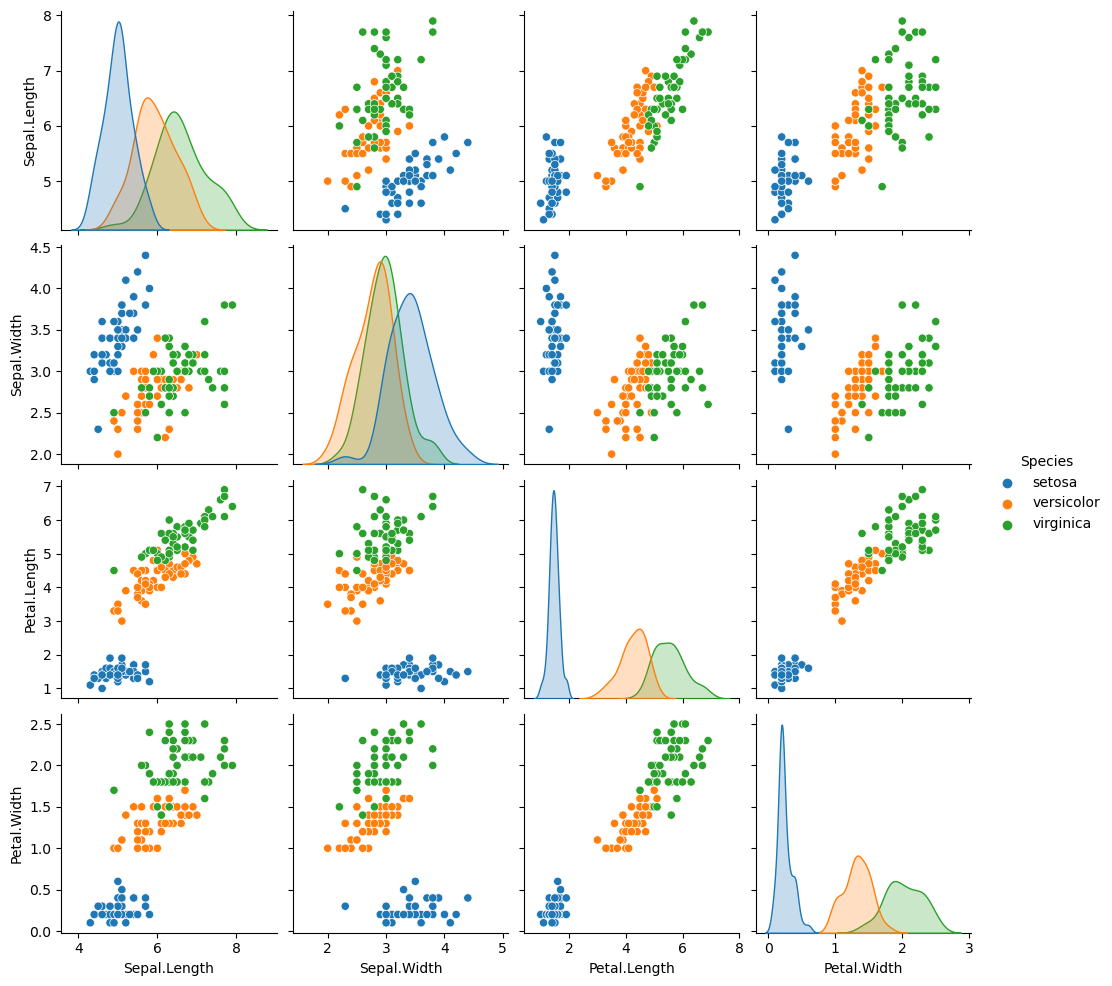

In [62]:
sns.pairplot(pd.DataFrame(data("iris")), hue = 'Species')

<font size = "4"> 
<h4> <font color = #20B59D> 3. Homoscedasticity of Residuals or Equal Variances</font></h4>
Homoscedasity is the term that states that the spread residuals which we are getting from the linear regression model should be homogeneous or equal spaces. <br>It refers to a condition in which the variance of the residual, or error term, in a regression model is constant. That is, the error term does not vary much as the value of the predictor variable changes. refers to a condition in which the variance of the residual, or error term, in a regression model is constant. That is, the error term does not vary much as the value of the predictor variable changes. <br>The lack of homoscedasticity may suggest that the regression model may need to include additional predictor variables to explain the performance of the dependent variable.

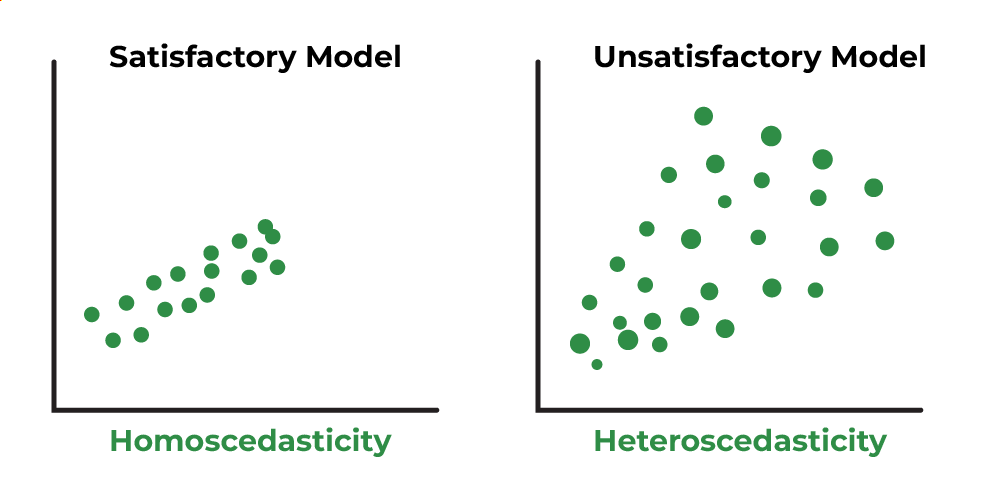

<font size = "4">**For example**, suppose you wanted to explain student test scores using the amount of time each student spent studying. In this case, the test scores would be the dependent variable and the time spent studying would be the predictor variable. <br><br> The error term would show the amount of variance in the test scores that was not explained by the amount of time studying. If that variance is uniform, or homoscedastic, then that would suggest the model may be an adequate explanation for test performance—explaining it in terms of time spent studying.<br><br>But the variance may be heteroscedastic. A plot of the error term data may show a large amount of study time corresponded very closely with high test scores but that low study time test scores varied widely and even included some very high scores.<br><br>
So the variance of scores would not be well-explained simply by one predictor variable—the amount of time studying. In this case, some other factor is probably at work, and the model may need to be enhanced in order to identify it or them. <br><br> Further investigation may reveal that some students had seen the answers to the test ahead of time or that they had previously taken a similar test, and therefore didn't need to study for this particular test. <br>To improve on the regression model, the researcher would have to try out other explanatory variables that could provide a more accurate fit to the data. If, for example, some students had seen the answers ahead of time, the regression model would then have two explanatory variables: time studying, and whether the student had prior knowledge of the answers.<br><br>
With these two variables, more of the variance of the test scores would be explained and the variance of the error term might then be homoskedastic, suggesting that the model was well-defined.

<font size = "4">
<h4> <font color = #20B59D> 4. No Autocorrelation in residuals</font></h4>
One of the critical assumptions of multiple linear regression is that there should be no autocorrelation in the data. When the residuals are dependent on each other, there is autocorrelation. This factor is visible in the case of stock prices when the price of a stock is not independent of its previous one. Another example is, the temperatures on different days in a month are autocorrelated. The temperature the next day tends to rise when it’s been increasing and tends to drop when it’s been decreasing during the previous days.
<h4> <font color = #20B59D> 5. Number of observations Greater than the number of predictors</font></h4> For a better-performing model, the number of training data or observations should be always greater than the number of test or prediction data. However greater the number of observations better the model performance. Therefore, to build a linear regression model you must have more observations than the number of independent variables (predictors) in the data set. The reason behind this can be understood by the curse of dimensionality.
<h4> <font color = #20B59D> 6. Each observation is unique</font></h4>
It is also important to ensure that each observation is independent of the other observation.  Meaning each observation in the data set should be measured separately on a unique occurrence of the event that caused the observation.
<h4> <font color = #20B59D> 7. Predictors are distributed Normally</font></h4>
 It is a good habit to check graphically the distributions of all variables, both dependent and independent. <br>If some of them are slightly skewed, keep them as they are. On the other hand, highly skewed variables should be normalized before fitting the model.

After fitting the model, it is necessary to make sure that the residuals are distributed normally, to ascertain its technical correctness. <br><br> One can get an idea of the distribution of the predicted values by plotting density, KDE, or QQ plots for the predictions.

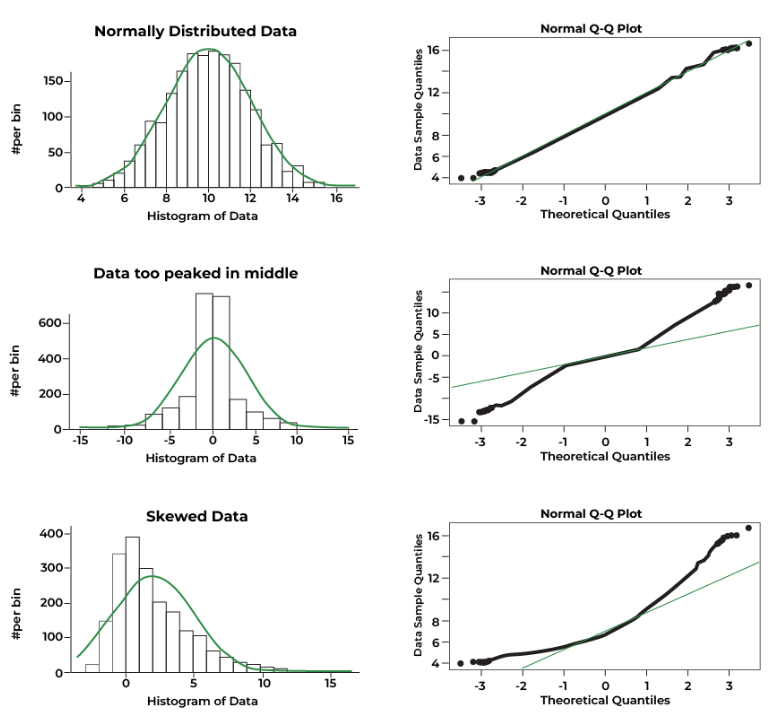

<font size = "4"><font color = #319ECF size = 5> <b> Que. 1 </b> What is curse of dimensionality?<br><b>Ans.</font></b> In machine learning, we often have high-dimensional data. If we've a data with 60 different features, we’re working in a space with 60 dimensions. If we’re analyzing grayscale images sized 50x50, we’re working in a space with 2,500 dimensions. If the images are RGB-colored, the dimensionality increases to 7,500 dimensions (one dimension for each color channel in each pixel in the image).<br><br> High dimensional data is when a dataset a number of features (p) that is bigger than the number of observations (N). High dimensional data is the problem that leads to the curse of dimensionality. The equation for high dimensional data is usually written like p >> N. <br><br> Curse of Dimensionality shows that as the number of features increases, the classifier model’s performance increases as well until we reach the optimal number of features. Adding more features based on the same size as the training set will then degrade the classifier’s performance.

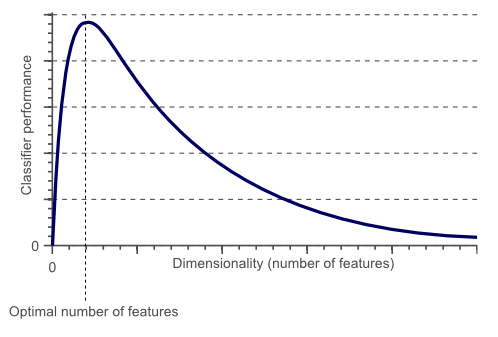\

<font size = "4"> To mitigate the problems associated with high dimensional data ‘Dimensionality reduction techniques are used. - 'Feature selection' or 'Feature extraction'<br><br><font size = "5"> (i) <u> Feature selection Techniques </u></font> <br>
&emsp;1. <b>Low Variance filter</b> :- Attributes with very low variance are eliminated. Attributes that do not have such much variance will assume an almost constant value and do not contribute to the predictability of the model.<br>
&emsp;2. <b>High Correlation filter</b><br>
&emsp;3. <b>Multicollinearity</b><br>
&emsp;4. <b>Feature Ranking</b> :- Decision Tree models such as CART can rank the attributes based on their importance or contribution to the predictability of the model.<font size = "5"><br><br> (ii) <u>Feature selection Techniques </u></font> <br>&emsp; In feature extraction techniques, the high dimensional attributes are combined in low dimensional components (PCA or ICA) or factored into low dimensional factors (FA). e.g., PCA